# Visualizing Earnings Based on College Majors

In this study, we will do an analysis of data related to college majors.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on [their Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

There is a wealth of information in this dataset. We'll explore a couple of things via a variety of visualizations (scatter plots, histograms, scatter matrices, bar charts) aiming to answer questions such as: 
* Do students in more popular majors make more money?
* How many majors are predominantly male? Predominantly female?
* Which category of majors have the most students?


## Preparations and initial data exploration

Let's start with some preparations to enable data visualization in this notebook.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Enable display of plots inline
%matplotlib inline

Let's read in the data and do some initial exploration.

In [2]:
# Read in the data
recent_grads = pd.read_csv('recent-grads.csv')

# Show count of rows and columns
print ('Row count, column count:', recent_grads.shape)

# Show the first row (in table format)
print ('\n')
print (recent_grads.iloc[0])

# Show the first three and the last three rows
print ('\n')
print (recent_grads.head(3))
print ('\n')
print (recent_grads.tail(3))

# Show key statistics of all (numeric) columns
print ('\n')
print (recent_grads.describe())

Row count, column count: (173, 21)


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             1

To enable data visualization using `matplotlib`, there should not be rows with missing values. Let's do the required cleaning (and check how much data was removed). 

In [3]:
# Number of rows (before)
raw_data_count = recent_grads.shape[0]
print ('Number of rows in the raw data: ', raw_data_count)

# Drop rows with missing values
recent_grads.dropna(inplace = True)

# Number of rows (after)
cleaned_data_count = recent_grads.shape[0]
print ('Number of rows after removing rows with missing values: ', cleaned_data_count)

Number of rows in the raw data:  173
Number of rows after removing rows with missing values:  172


One row deleted, 172 rows remaining.
We are now ready to explore this data using visualiztions. 

## Visualizations

To understand the various plots below, take note of what the different columns in the data represent:


    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.


We'll start with creating some **scatter plots** to see if we can find answers to these questions:

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?


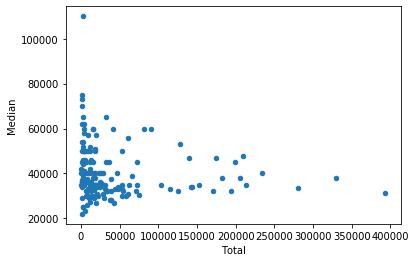

In [4]:
# Scatter plot showing median salary vs total number of people with the major
recent_grads.plot(x='Total', y='Median', kind='scatter')

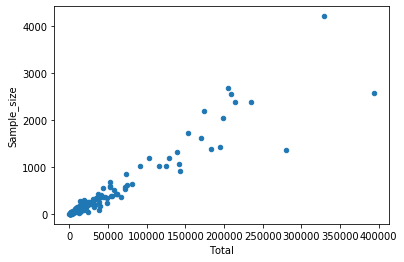

In [5]:
# Scatter plot showing the sample size for median salary figures vs total number of people with the major
recent_grads.plot(x='Total', y='Sample_size', kind='scatter')

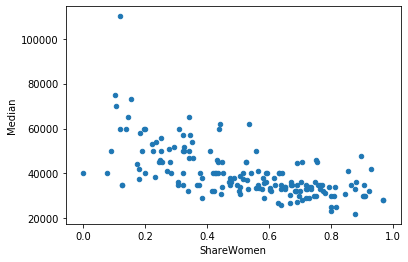

In [6]:
# Scatter plot showing median salary vs the percentage of women with the major
recent_grads.plot (x='ShareWomen', y='Median', kind = 'Scatter')

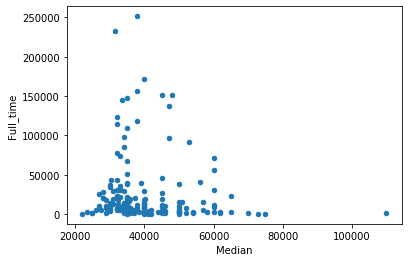

In [7]:
# Scatter plot showing the number of full-time employed vs the median salary
recent_grads.plot (y='Full_time', x='Median', kind = 'Scatter')

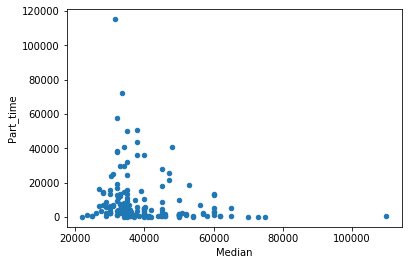

In [8]:
# Scatter plot showing the number of part-time employed vs the median salary
recent_grads.plot (y='Part_time', x='Median', kind = 'Scatter')

Conclusions:
* **Popularity vs (median) salary.** From the first plot it seems that we can conclude that for more popular majors the median salary is typically a bit lower. Or to turn it around, in any case: the majors with the highest median salaries are not those with the higher number of graduates! Given the second plot, it must be noted though that the sample sizes that are used for deriving the salary information are very small in comparison to the total number of graduates, and we cannot be sure how representative these samples are.
* **Gender vs (median) salary.** From the third plot we can conclude that majors with higher percentages of women, the median saleries are lower.
* **Full_time employees vs (median) salary**. From the fourth and fifth plot one may conclude (by comparing the shapes) that full_time employment yields higher (median) salaries. The evidence is not strong, however, and this would require further investigation.

We'll continue with creating some **histograms** to find answers to this:

* What percent of majors are predominantly male? Predominantly female?
* What's the most common median salary range?

Let's create a histogram to how the 'percentage-of-women' is distributed. Conclusions are written directly below each graph.

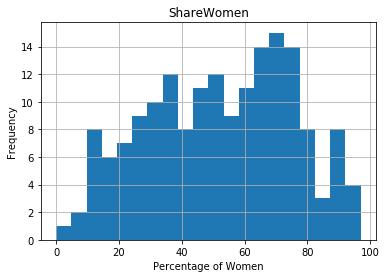

In [9]:
fig, ax = plt.subplots()
selected_column = 'ShareWomen'
data_to_show = recent_grads[selected_column]*100 #Multiply by 100 to show as a percentage
data_to_show.hist(bins=20)
ax.set_title(selected_column)
ax.set_xticks
ax.set_xlabel('Percentage of Women')
ax.set_ylabel('Frequency')
plt.show()

What we can see is that there are majors where the percentage of women is (close to) 0% and majors where the percentage of women is (almost) 100%. And everything is between. To answer our question, we can (be-it somewhat clunky) create the same histogram with just two categories.

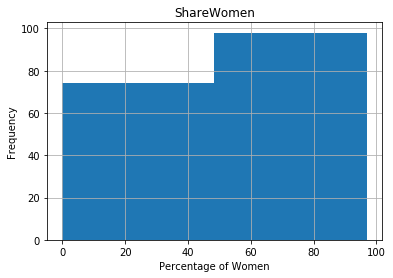

In [10]:
fig, ax = plt.subplots()
selected_column = 'ShareWomen'
data_to_show = recent_grads[selected_column]*100 #Multiply by 100 to show as a percentage
data_to_show.hist(bins=2)
ax.set_title(selected_column)
ax.set_xticks
ax.set_xlabel('Percentage of Women')
ax.set_ylabel('Frequency')
plt.show()

We can see that the there are almost 80 majors where the percentage of women is below 50%, and almost 100 majors where the percentage of women is above 50%.

Let's now go search for common median saleries, by showing a histogram of the median salaries. 

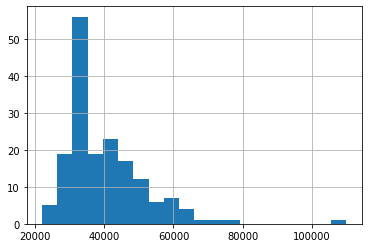

In [11]:
recent_grads['Median'].hist(bins=20)

It looks like the ranges between 25K and 50K are most common. Let's zoom in further on this part.

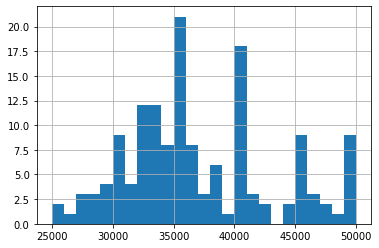

In [12]:
recent_grads['Median'].hist(bins=25, range=(25000,50000))

It looks like very common (median) salaries are 35-36K and 40-41K.

Let's looking further in the relations between (1)total number of majors (2)the median salary (3) percentage of women by creating a **scatter-matrix** for these three. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001876F5C3F98>,
      dtype=object)

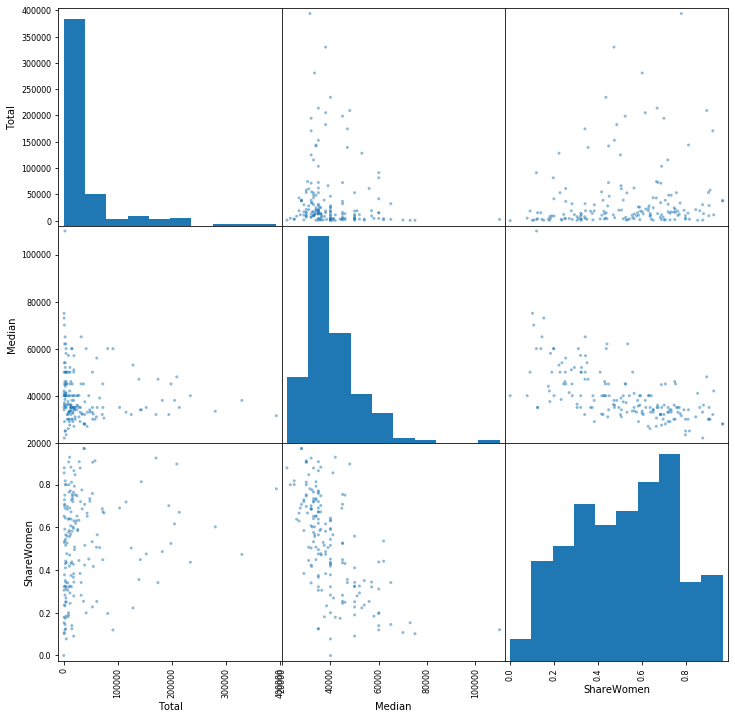

In [13]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Total','Median', 'ShareWomen']], figsize = (12,12))

What we can see from these plots is that: 
* majors that are more popular tend to have a somewhat lower median salary
* majors that are more popular tend to attract a higher percentage of women
In line with what we observed earlier

Now let's also create **bar-plots** for the first 10 and for the last 10 majors in the list to see what we can learn from that.

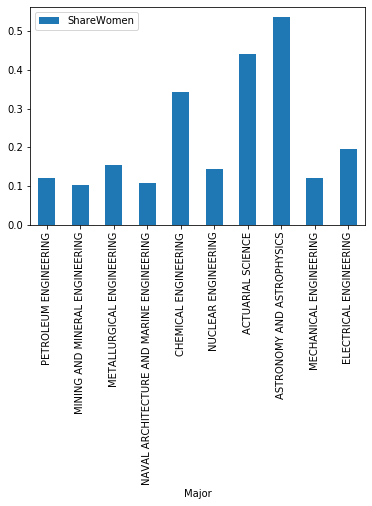

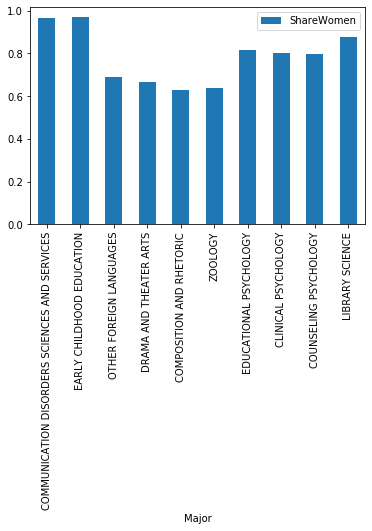

In [14]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')


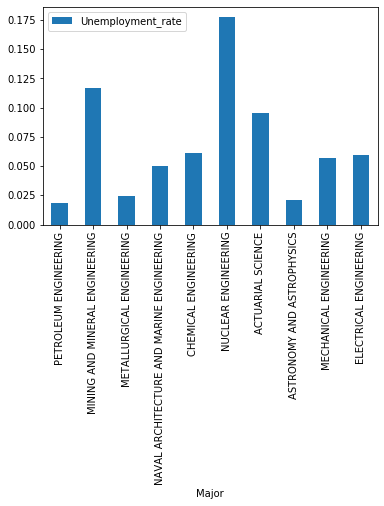

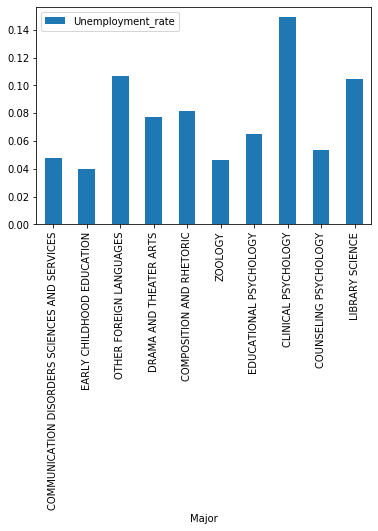

In [15]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

What we see:
* 'Engineering' majors (well represented in the first ten) attract low percentages of women; unemployments rates seem generally low (with the exception of Nuclear Engineering)
* Majors like psychology and language/education oriented topics attract higher percentages of women; unemployment rates are somewhat higher

## Wrapping up

Let's wrap-up with sharing some of the observations that we made above:
* The most popular majors are not those that result in the highest (median) salaries.
* Majors with higher percentages of women (which is actually a majority) tend to have lower (median) salaries.

Clearly, we've only be scratching the surface. The dataset  contains a wealth of interesting data to explore. Possibly to be continued at another occassion!